# **Informe Proyecto Final  💻**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo:**

- Alejandra Toro
- Martín Torrico

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/MartinTorricoP/Laboratorios_MDS7202)

---

## **1. Introducción [0.25 puntos]**

El problema de este proyecto nace debido a que El Banco de Comisiones Infinitas (BCI) dice enfrentar un aumento preocupante de préstamos incobrables, lo que amenaza su estabilidad financiera. Ante este escenario, el banco desarrollar un modelo predictivo de riesgo que permita identificar a los clientes con mayor probabilidad de incumplir con sus pagos.

El objetivo no es solo minimizar las pérdidas por morosidad, sino también maximizar los ingresos identificando estratégicamente a los clientes que pagarían justo antes de entrar en mora, aprovechando las tasas de interés más altas asociadas a estos perfiles.

En este proyecto se pretende predecir la probabilidad de morosidad de los clientes, es decir, la probabilidad de que un cliente incumpla sus pagos en el futuro. Esta predicción permitirá tomar decisiones informadas para gestionar el riesgo de manera eficiente y alineada con el objetivo del banco en este caso de maximizar sus ingresos.

En cuanto a los datos, al comenzar cada una de las 3 etapas del proyecto (separadas por una semana) se fue actualizando los datasets de entrenamiento y testeo incrementando su número de observaciones, dividendose tal que: 

*Primera Etapa*: Se establece un conjunto de entrenamiento inicial (X_t0, y_t0) y un conjunto de validación (X_t1).

*Segunda Etapa*: Se añade un nuevo conjunto de evaluación (X_t2) y el conjunto de validación anterior (X_t1, y_t1) se amplía con más observaciones, pasando a formar parte del entrenamiento.

*Tercera Etapa*: Se introduce un nuevo conjunto de evaluación (X_t3) mientras que los conjuntos previos de evaluación (X_t2, y_t2) nuevamente incrementa su número de observaciones y se integran al entrenamiento.

Los datasets X_t contienen un total de 79 variables (columnas) que abarcan distintos aspectos del comportamiento financiero de las billeteras de los clientes del banco en una plataforma basada en Ethereum (ETH).

Estas variables incluyen datos sobre transacciones generales, factores de riesgo, actividades de préstamo y reembolso, depósitos y retiros, eventos de liquidación, colaterales asociados, indicadores de mercado, entre otros (los datos se encuentran listados y descritos en el Anexo).

Por otro lado, los datasets y_t contienen 1 variable que contiene las etiquetas binarias que indican si el cliente está o no en estado de morosidad.

In [1]:
import pandas as pd

# Cargar los datos de datos Etapa 1
X_t0_e1 = pd.read_parquet("data/X_t0.parquet")
X_t1_e1 = pd.read_parquet("data/X_t1.parquet")
y_t0_e1 = pd.read_parquet("data/y_t0.parquet")

# Cargar el conjunto de datos Etapa 2
X_t0_e2 = pd.read_parquet("data_etapa2/X_t0.parquet")
X_t1_e2 = pd.read_parquet("data_etapa2/X_t1.parquet")
X_t2_e2 = pd.read_parquet("data_etapa2/X_t2.parquet")
y_t0_e2 = pd.read_parquet("data_etapa2/y_t0.parquet")
y_t1_e2 = pd.read_parquet("data_etapa2/y_t1.parquet")

# Cargar el conjunto de datos Etapa 3
X_t0_e3 = pd.read_parquet("data_etapa3/X_t0.parquet")
X_t1_e3 = pd.read_parquet("data_etapa3/X_t1.parquet")
X_t2_e3 = pd.read_parquet("data_etapa3/X_t2.parquet")
X_t3_e3 = pd.read_parquet("data_etapa3/X_t3.parquet")
y_t0_e3 = pd.read_parquet("data_etapa3/y_t0.parquet")
y_t1_e3 = pd.read_parquet("data_etapa3/y_t1.parquet")
y_t2_e3 = pd.read_parquet("data_etapa3/y_t2.parquet")

In [16]:
# Forma de cada conjunto de datos

# Etapa 1
print("Etapa 1:")
print("Cantidad de filas y columnas de X_t0_e1:", X_t0_e1.shape)
print("Cantidad de filas y columnas de y_t0_e1:", y_t0_e1.shape)
print("Cantidad de filas y columnas de X_t1_e1:", X_t1_e1.shape)

# Etapa 2
print("\nEtapa 2:")
print("Cantidad de filas y columnas de X_t0_e2:", X_t0_e2.shape)
print("Cantidad de filas y columnas de y_t0_e2:", y_t0_e2.shape)
print("Cantidad de filas y columnas de X_t1_e2:", X_t1_e2.shape)
print("Cantidad de filas y columnas de y_t1_e2:", y_t1_e2.shape)
print("Cantidad de filas y columnas de X_t2_e2:", X_t2_e2.shape)

# Etapa 3
print("\nEtapa 3:")
print("Cantidad de filas y columnas de X_t0_e3:", X_t0_e3.shape)
print("Cantidad de filas y columnas de y_t0_e3:", y_t0_e3.shape)
print("Cantidad de filas y columnas de X_t1_e3:", X_t1_e3.shape)
print("Cantidad de filas y columnas de y_t1_e3:", y_t1_e3.shape)
print("Cantidad de filas y columnas de X_t2_e3:", X_t2_e3.shape)
print("Cantidad de filas y columnas de y_t2_e3:", y_t2_e3.shape)
print("Cantidad de filas y columnas de X_t3_e3:", X_t3_e3.shape)

Etapa 1:
Cantidad de filas y columnas de X_t0_e1: (44296, 77)
Cantidad de filas y columnas de y_t0_e1: (44296, 1)
Cantidad de filas y columnas de X_t1_e1: (44296, 77)

Etapa 2:
Cantidad de filas y columnas de X_t0_e2: (44296, 77)
Cantidad de filas y columnas de y_t0_e2: (44296, 1)
Cantidad de filas y columnas de X_t1_e2: (132888, 77)
Cantidad de filas y columnas de y_t1_e2: (132888, 1)
Cantidad de filas y columnas de X_t2_e2: (88592, 77)

Etapa 3:
Cantidad de filas y columnas de X_t0_e3: (44296, 77)
Cantidad de filas y columnas de y_t0_e3: (44296, 1)
Cantidad de filas y columnas de X_t1_e3: (132888, 77)
Cantidad de filas y columnas de y_t1_e3: (132888, 1)
Cantidad de filas y columnas de X_t2_e3: (177184, 77)
Cantidad de filas y columnas de y_t2_e3: (177184, 1)
Cantidad de filas y columnas de X_t3_e3: (88593, 77)


La métrica de seleccionada para evaluar los modelos fue el f1-score debido al desbalance en los datos y su capacidad para equilibrar precisión y recall. 

Dado que la clase de interés es identificar a los clientes morosos, el f1-score garantiza un enfoque en maximizar la detección efectiva de los clientes morosos sin comprometer la precisión de las predicciones positivas. 

Basándonos en la métrica anterior, se evaluaron diversos modelos de machine learning para abordar el problema para obtener un baseline, desde el modelo Dummy (F1-score: 0.508) hasta algoritmos avanzados como Random Forest (0.886) y XGBoost (0.853), que mostraron el mejor desempeño y por ello fueron considerados para seguir con el desarollo. A continuación, presentamos los resultados de los modelos baseline:

| Index | Model                 | F1-score   | Tiempo (s) |
|-------|-----------------------|------------|------------|
| 0     | Random Forest         | 0.885896   | 98.985158  |
| 1     | XGBoost               | 0.852805   | 2.074844   |
| 2     | LightGBM              | 0.830291   | 2.199728   |
| 3     | Decision Tree         | 0.811669   | 16.622277  |
| 4     | KNN                   | 0.740120   | 15.524004  |
| 5     | Logistic Regression   | 0.726420   | 3.794548   |
| 6     | Dummy                 | 0.507316   | 0.012002   |

Durante el preprocesamiento de los datos, se realizaron varias transformaciones intermedias para preparar las características. En primer lugar, las columnas fueron divididas en tres grupos principales: categóricas, numéricas y timestamps. En primer lugar se eliminó la única columna categórica ya que no aportaba información relevante para la predicción, las columnas de tipo timestamp se procesaron utilizando un DateTransformer que descompone las fechas en componentes de año, mes y día y las columnas numéricas se escalaron utilizando StandardScaler para normalizar sus valores y garantizar una escala uniforme para el entrenamiento.

Posteriormente los datos transformados se ajustaron para asegurar que las columnas numéricas estuvieran en formato float y los componentes de fecha en formato int, dejando los datos listos para el entrenamiento y testeo del baseline.

`Falta explicar: Un cierre con un análisis general de los resultados obtenidos, indicando si el modelo final cumplió con los objetivos y cómo se posicionaron respecto a otros equipos.`

## **2. Preprocesamiento [0.75 puntos]**

### **2.1 Análisis Exploratorio de Datos [0.5 puntos]**

Tomamos de ejemplo X_t2 de la Etapa 3, ya que, como se mencionó anteriormente, el único cambio entre los datasets son las entradas nuevas que estas incorporan y cambian la distribución entre las variables. Se toma este de ejemplo ya que cuenta con la mayor cantidad de entradas dentro de los X_t entregados.

Valores Nulos:

In [3]:
# Valores nulos por dataset según etapa
# Etapa 1
print("Etapa 1:")
print(f"Valores nulos en X_t0_e1: {X_t0_e1.isnull().sum().sum()}")
print(f"Valores nulos en X_t1_e1: {X_t1_e1.isnull().sum().sum()}")
print(f"Valores nulos en y_t0_e1: {y_t0_e1.isnull().sum().sum()}")

# Etapa 2
print("\nEtapa 2:")
print(f"Valores nulos en X_t0_e2: {X_t0_e2.isnull().sum().sum()}")
print(f"Valores nulos en X_t1_e2: {X_t1_e2.isnull().sum().sum()}")
print(f"Valores nulos en X_t2_e2: {X_t2_e2.isnull().sum().sum()}")
print(f"Valores nulos en y_t0_e2: {y_t0_e2.isnull().sum().sum()}")
print(f"Valores nulos en y_t1_e2: {y_t1_e2.isnull().sum().sum()}")

# Etapa 3
print("\nEtapa 3:")
print(f"Valores nulos en X_t0_e3: {X_t0_e3.isnull().sum().sum()}")
print(f"Valores nulos en X_t1_e3: {X_t1_e3.isnull().sum().sum()}")
print(f"Valores nulos en X_t2_e3: {X_t2_e3.isnull().sum().sum()}")
print(f"Valores nulos en X_t3_e3: {X_t3_e3.isnull().sum().sum()}")
print(f"Valores nulos en y_t0_e3: {y_t0_e3.isnull().sum().sum()}")
print(f"Valores nulos en y_t1_e3: {y_t1_e3.isnull().sum().sum()}")
print(f"Valores nulos en y_t2_e3: {y_t2_e3.isnull().sum().sum()}")

Etapa 1:
Valores nulos en X_t0_e1: 0
Valores nulos en X_t1_e1: 0
Valores nulos en y_t0_e1: 0

Etapa 2:
Valores nulos en X_t0_e2: 0
Valores nulos en X_t1_e2: 0
Valores nulos en X_t2_e2: 0
Valores nulos en y_t0_e2: 0
Valores nulos en y_t1_e2: 0

Etapa 3:
Valores nulos en X_t0_e3: 0
Valores nulos en X_t1_e3: 0
Valores nulos en X_t2_e3: 0
Valores nulos en X_t3_e3: 0
Valores nulos en y_t0_e3: 0
Valores nulos en y_t1_e3: 0
Valores nulos en y_t2_e3: 0


Tomando en consideración que no existen valores nulos en ninguno de los dataframe, no se aplicarán estrategias de imputación de variables nulas.

In [2]:
# Resumen estadístico general
df = X_t2_e3
df.describe()

borrow_block_number  borrow_timestamp  first_tx_timestamp  \
count         1.771840e+05      1.771840e+05        1.771840e+05   
mean          1.350012e+07      1.635393e+09        1.599918e+09   
std           9.158735e+05      1.238874e+07        3.960168e+07   
min           1.233130e+07      1.619645e+09        1.438270e+09   
25%           1.270531e+07      1.624652e+09        1.592820e+09   
50%           1.322699e+07      1.631664e+09        1.612057e+09   
75%           1.439407e+07      1.647386e+09        1.623368e+09   
max           1.527017e+07      1.659540e+09        1.659527e+09   

       last_tx_timestamp    wallet_age  incoming_tx_count  outgoing_tx_count  \
count       1.771840e+05  1.771840e+05      177184.000000       1.771840e+05   
mean        1.635264e+09  3.547496e+07         722.478638       2.457742e+03   
std         1.240051e+07  3.839986e+07        1881.280244       3.503734e+04   
min         1.582752e+09  0.000000e+00           0.000000       0.000000e+00   
25%         1.624549e+09  7.812619e+06          38.000000       5.600000e+01   
50%         1.631502e+09  2.247533e+07         158.000000       2.450000e+02   
75%         1.647181e+09  4.576977e+07         583.000000       8.960000e+02   
max         1.659539e+09  2.187131e+08      197999.000000       1.001333e+06   

       net_incoming_tx_count  total_gas_paid_eth  avg_gas_paid_per_tx_eth  \
count          177184.000000       177184.000000            177184.000000   
mean            -1735.263015           29.156530                 0.019152   
std             34740.774210          143.359106                 0.035345   
min           -995735.000000            0.000000                 0.000000   
25%              -273.000000            0.475752                 0.007455   
50%               -64.000000            3.048883                 0.012663   
75%                -9.000000           15.643339                 0.019846   
max            196374.000000         4342.308858                 1.445941   

       ...  market_macdsignal  market_max_drawdown_365d    market_natr  \
count  ...      177184.000000             177184.000000  177184.000000   
mean   ...          10.995174                 -0.603719       7.681982   
std    ...         155.792055                  0.099395       2.419404   
min    ...        -288.690622                 -0.816810       3.758920   
25%    ...        -105.466166                 -0.608560       5.760603   
50%    ...         -32.792233                 -0.608560       7.254521   
75%    ...         141.091652                 -0.608560       9.420594   
max    ...         391.719370                 -0.361351      15.106064   

       market_plus_di  market_plus_dm     market_ppo    market_rocp  \
count   177184.000000   177184.000000  177184.000000  177184.000000   
mean        21.015366     1923.005434       0.243623       0.019589   
std          8.561708    32610.374161       9.047667       0.188006   
min          5.468074      139.507654     -23.416773      -0.446001   
25%         14.288800      402.548247      -5.657386      -0.103492   
50%         19.388798      580.757461      -1.110209       0.012530   
75%         27.082041      777.262653       6.948835       0.143047   
max         44.883747   807296.000000      20.737590       0.521024   

         market_rocr  unique_borrow_protocol_count  \
count  177184.000000                 177184.000000   
mean        1.019589                      1.004391   
std         0.188006                      0.618448   
min         0.553999                      0.000000   
25%         0.896508                      1.000000   
50%         1.012530                      1.000000   
75%         1.143047                      1.000000   
max         1.521024                      4.000000   

       unique_lending_protocol_count  
count                  177184.000000  
mean                        1.310395  
std                         0.483919  
min                         0

In [5]:
# Contar los tipos de datos en el dataframe
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

float64    60
int64      16
object      1
Name: count, dtype: int64


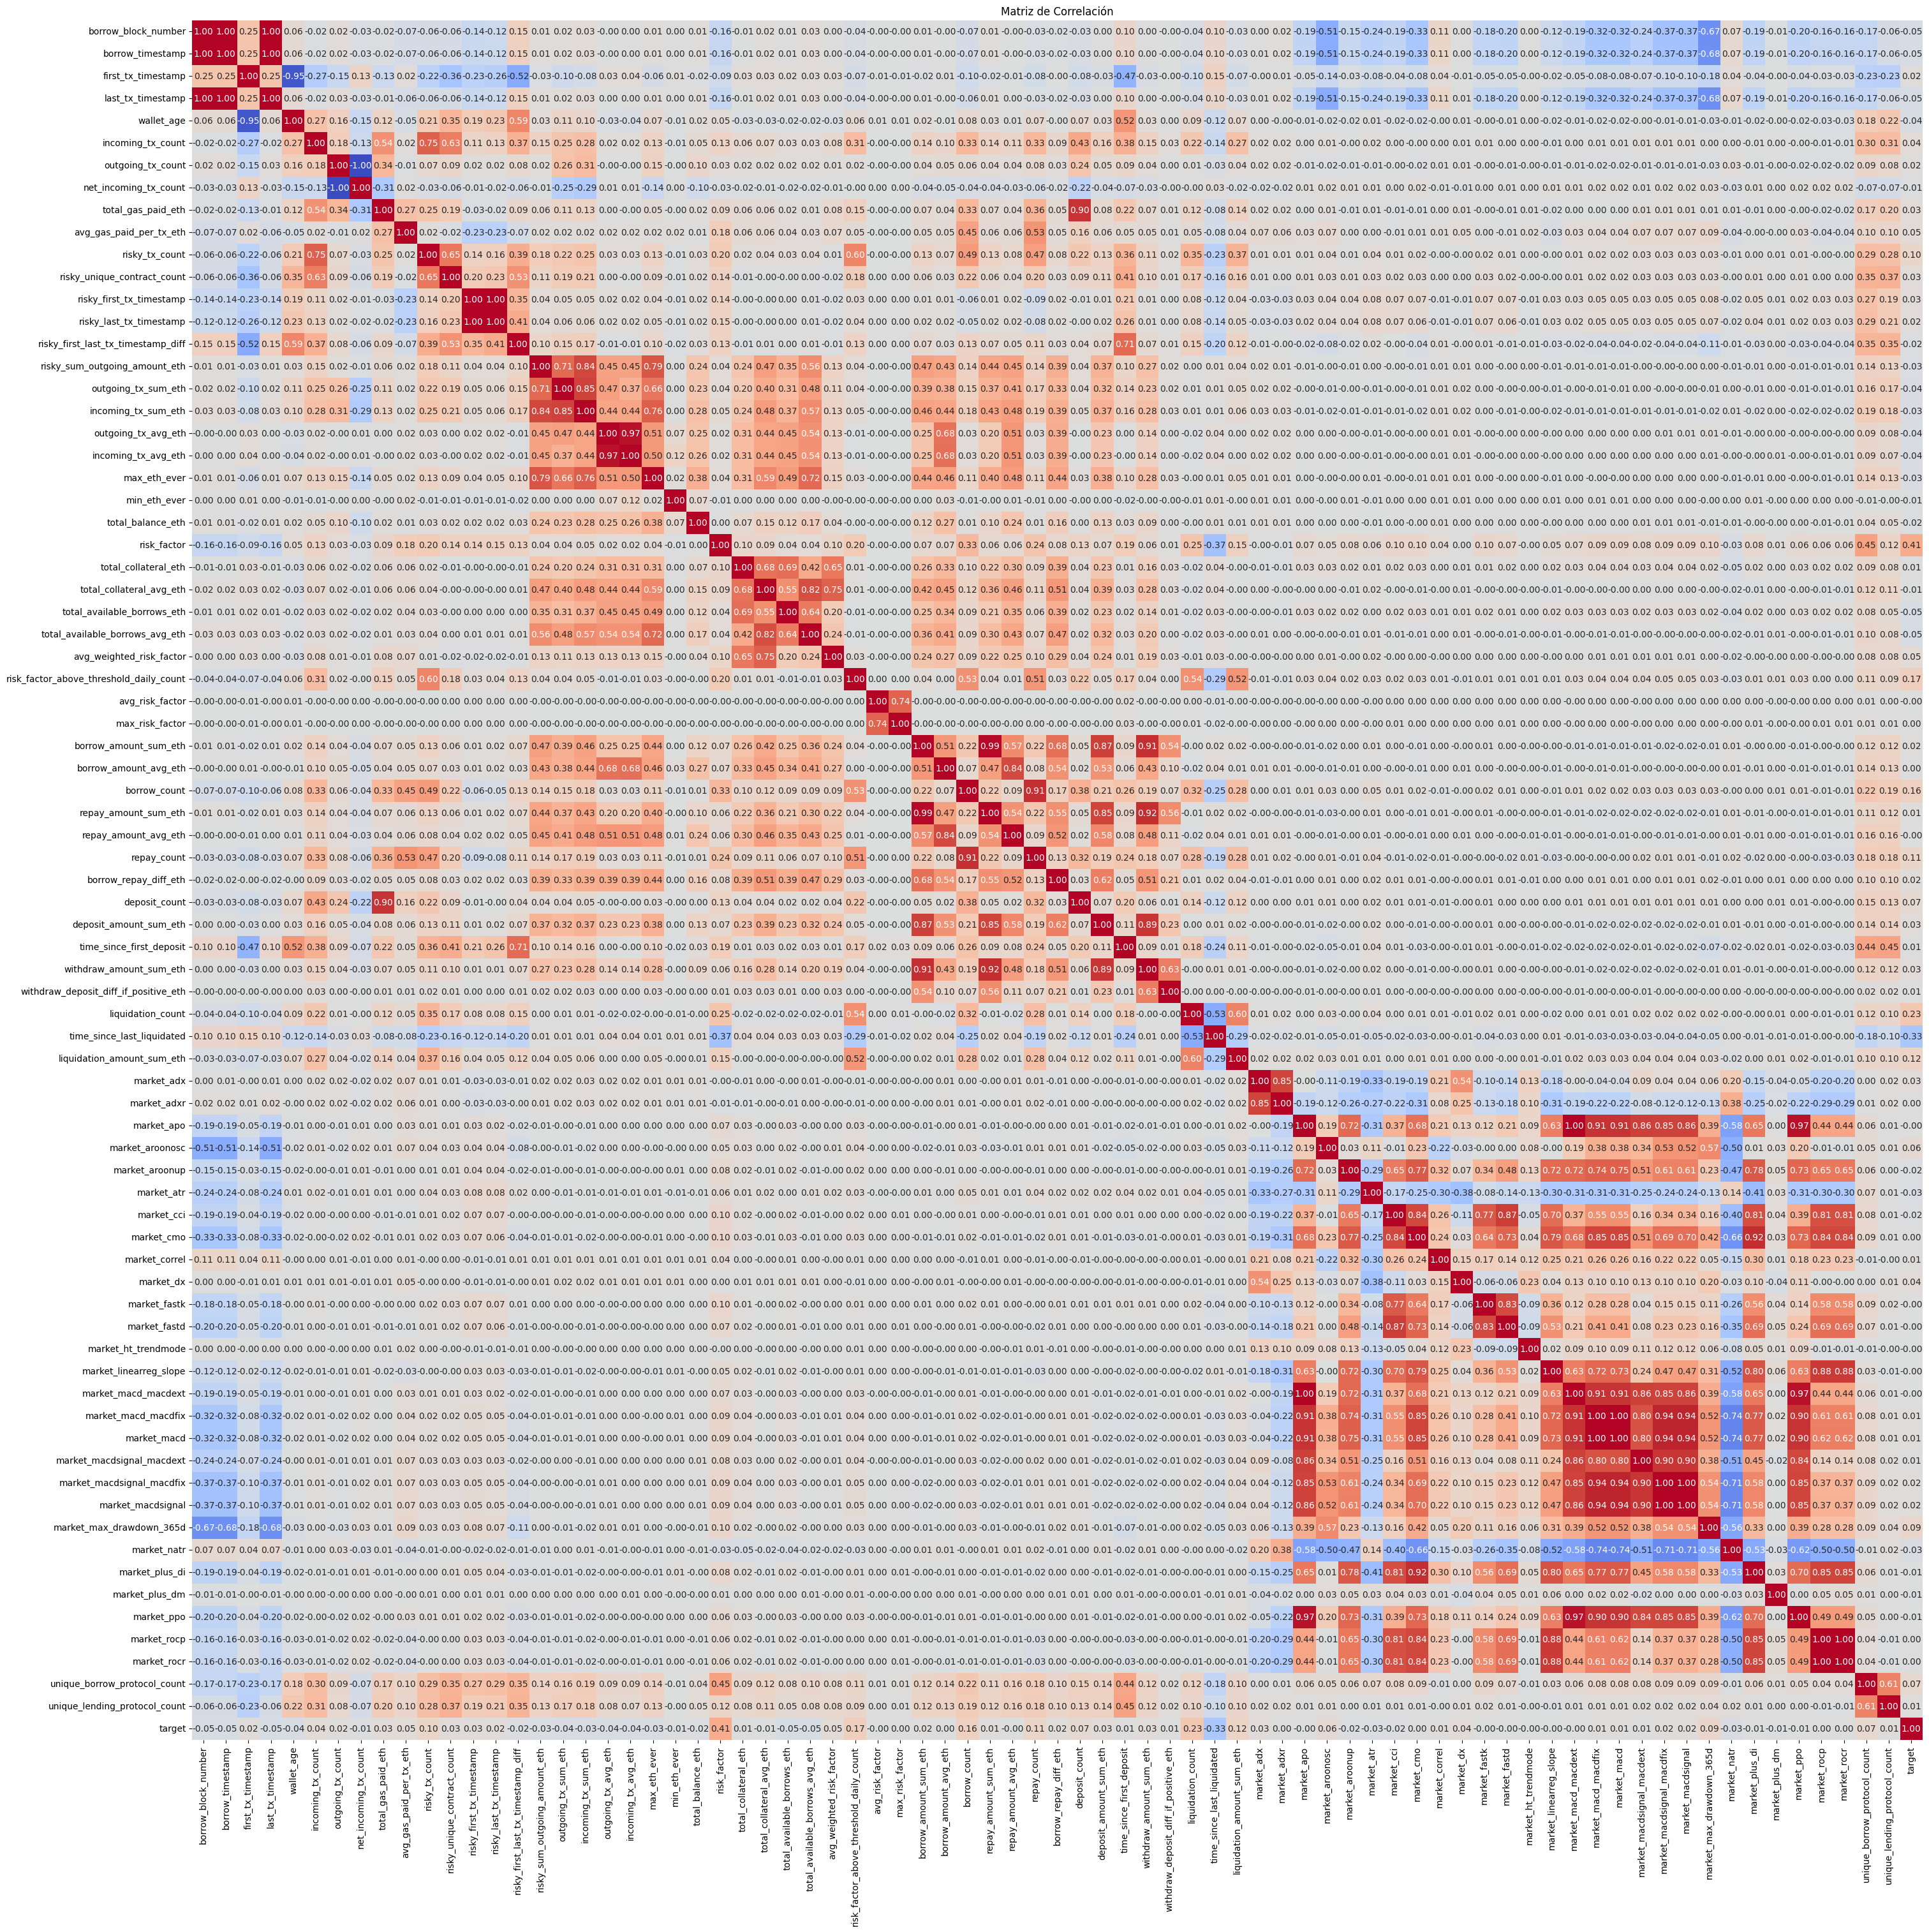

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Juntamos los datasets para añadir la columna target para observar la matriz de correlación
df_merged = X_t2_e3.copy()
df_merged['target'] = y_t2_e3['target']  # Agregamos la columna target

# Seleccionar solo las columnas numéricas
numerical_cols = df_merged.select_dtypes(include=[np.number]).columns

# Matriz de correlación incluyendo el target
corr_matrix = df_merged[numerical_cols].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(35, 35))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("Matriz de Correlación")
plt.show()

In [7]:
# Top 10 correlaciones positivas
positive_corr = corr_matrix['target'].sort_values(ascending=False).head(10)
positive_corr

target                                     1.000000
risk_factor                                0.405959
liquidation_count                          0.226073
risk_factor_above_threshold_daily_count    0.168784
borrow_count                               0.156106
liquidation_amount_sum_eth                 0.124948
repay_count                                0.108744
risky_tx_count                             0.104103
market_max_drawdown_365d                   0.094515
unique_borrow_protocol_count               0.071194
Name: target, dtype: float64

In [8]:
# Top 10 correlaciones negativas
negative_corr = corr_matrix['target'].sort_values(ascending=True).head(10)
negative_corr

time_since_last_liquidated        -0.326389
total_available_borrows_eth       -0.053708
borrow_timestamp                  -0.052364
borrow_block_number               -0.052126
total_available_borrows_avg_eth   -0.051203
last_tx_timestamp                 -0.049560
wallet_age                        -0.039064
outgoing_tx_avg_eth               -0.038698
outgoing_tx_sum_eth               -0.036680
incoming_tx_avg_eth               -0.036309
Name: target, dtype: float64

Considerando estos resultados de correlación, las variables con mayor relación absoluta con la variable objetivo son:
1. `risk_factor`: (0.406)
2. `time_since_last_liquidated`: (-0.326) 
3. `liquidation_count`: (0.226)
4. `risk_factor_above_threshold_daily_count`: (0.169)
5. `borrow_count`: (0.156)
6. `liquidation_amount_sum_eth`: (0.125)
7. `repay_count`: (0.108)
8. `risky_tx_count`: (0.104)
9. `market_max_drawdown_365d`: (0.094)
10. `unique_borrow_protocol_count`: (0.071) 

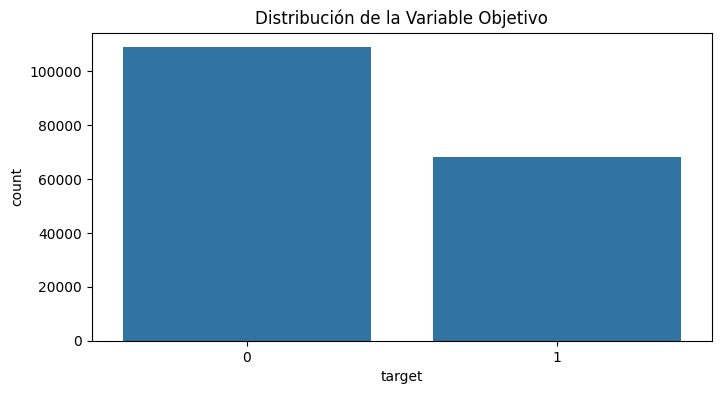

In [9]:
# Distribución de la variable target
plt.figure(figsize=(8, 4))
sns.countplot(x=y_t2_e3.iloc[:, 0])
plt.title("Distribución de la Variable Objetivo")
plt.show()

Observamos en este dataset un desbalance de clase importante, que será importante considerar a la hora del entrenamiento del modelo

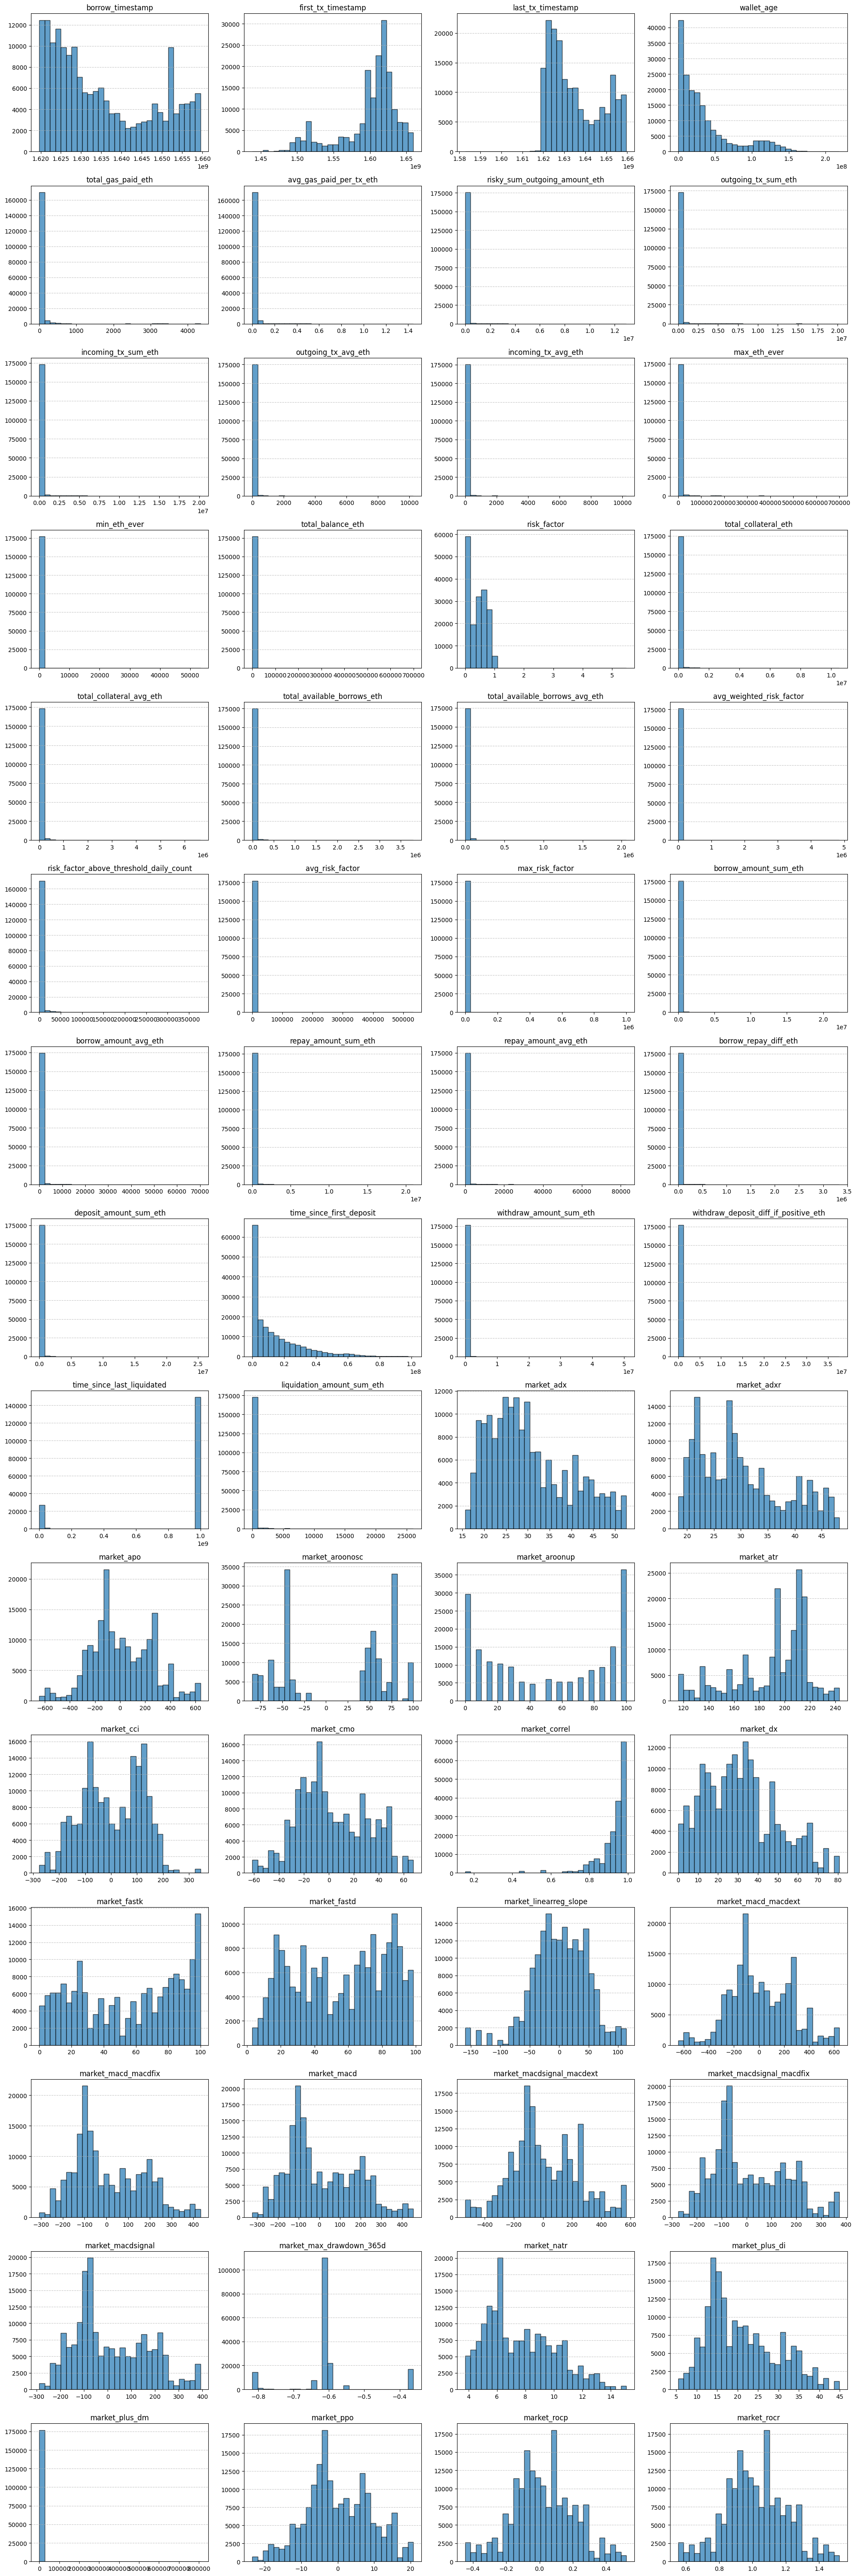

In [10]:
# Distribución de las variables tipo float

# Cuadrícula de gráficos para las columnas float
n_cols = 4  
float_columns = df.select_dtypes(include=['float']).columns
n_rows = int(np.ceil(len(float_columns) / n_cols))  

# Ajustar el tamaño de la figura según el número de gráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Iterar sobre las columnas y los ejes para crear los gráficos
for i, column in enumerate(float_columns):
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    ax.hist(df[column], bins=30, alpha=0.7, edgecolor='k')
    ax.set_title(column)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [11]:
# Diagramas de caja de las variables float
n_cols = 4  
n_rows = int(np.ceil(len(float_columns) / n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Iterar sobre las columnas y los ejes para crear los diagramas de caja
for i, column in enumerate(float_columns):
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    ax.boxplot(df[column].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    ax.set_title(column)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [12]:
# Distribución de las variables tipo int

# Cuadrícula de gráficos para las columnas int
n_cols = 4  
int_columns = df.select_dtypes(include=['int']).columns
n_rows = int(np.ceil(len(int_columns) / n_cols))  

# Ajustar el tamaño de la figura según el número de gráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Iterar sobre las columnas y los ejes para crear los gráficos
for i, column in enumerate(int_columns):
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    ax.hist(df[column], bins=30, alpha=0.7, edgecolor='k')
    ax.set_title(column)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

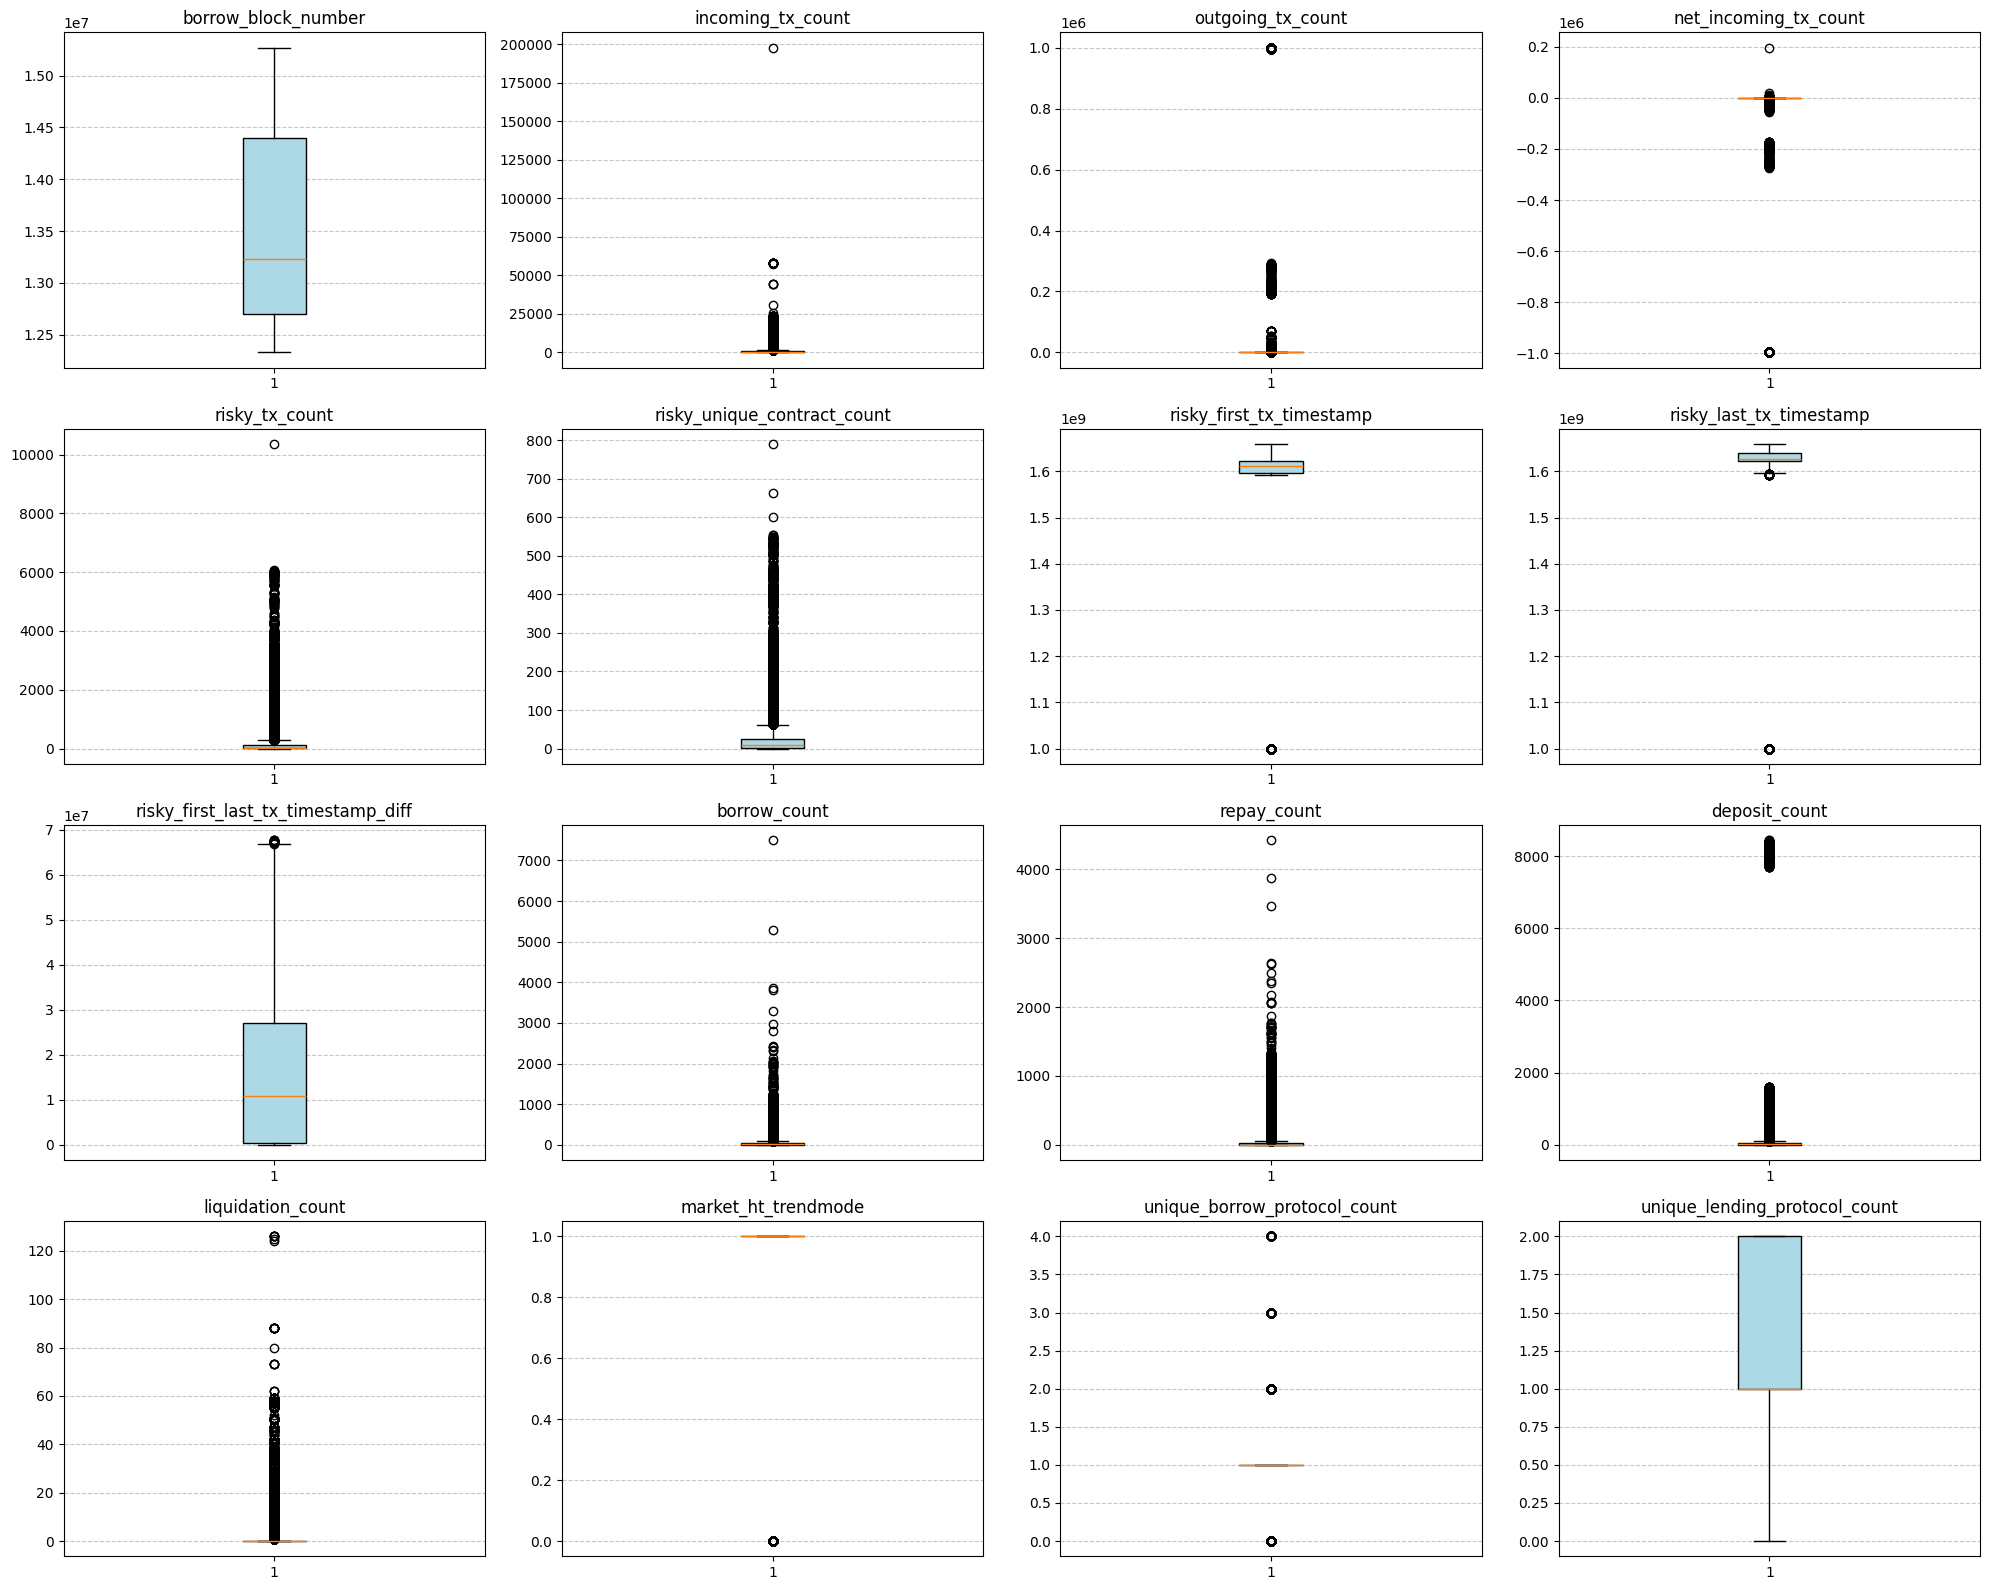

In [13]:
# Diagramas de caja de las variables int
n_cols = 4  
n_rows = int(np.ceil(len(int_columns) / n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Iterar sobre las columnas y los ejes para crear los diagramas de caja
for i, column in enumerate(int_columns):
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    ax.boxplot(df[column].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    ax.set_title(column)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

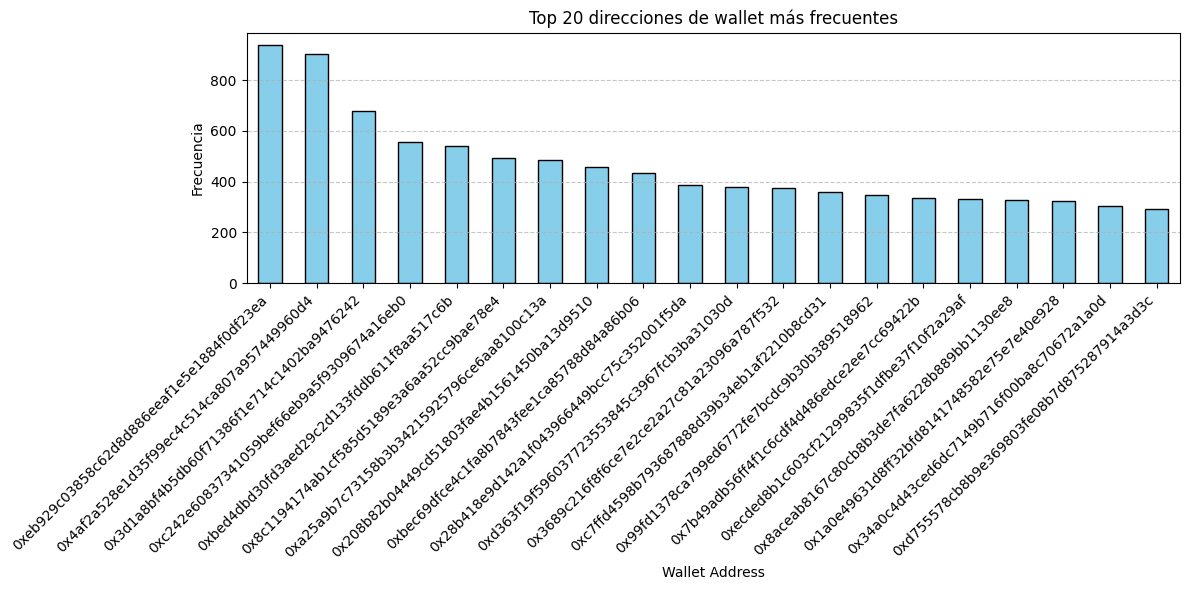

In [14]:
# Distribución de la variable tipo object
wallet_counts = df['wallet_address'].value_counts()

# Crear un gráfico de barras para las direcciones de wallet más comunes
plt.figure(figsize=(12, 6))
wallet_counts.head(20).plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Top 20 direcciones de wallet más frecuentes')
plt.xlabel('Wallet Address')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Casos de variables particulares:**

`time_since_last_liquidated:`

Muchos valores iguales a 999999999.0000000000

In [18]:
# Distribución de la variable time_since_last_liquidated
df['time_since_last_liquidated'].describe()

count    1.771840e+05
mean     8.438555e+08
std      3.615848e+08
min      1.900000e+01
25%      1.000000e+09
50%      1.000000e+09
75%      1.000000e+09
max      1.000000e+09
Name: time_since_last_liquidated, dtype: float64

In [16]:
# Calculamos los registros con time_since_last_liquidated < 999999999
df_filt = df[df['time_since_last_liquidated']<999999999]
proporcion = len(df_filt['time_since_last_liquidated']) / len(df)
print(f"Porcentaje de registros con time_since_last_liquidated < 999999999: {proporcion * 100:.2f}%")

Porcentaje de registros con time_since_last_liquidated < 999999999: 15.72%


In [17]:
# Estadísticas de los tiempos sin considerar los con valor 999999999
df_filt['time_since_last_liquidated'].describe()

count    2.785100e+04
mean     6.631398e+06
std      9.736221e+06
min      1.900000e+01
25%      7.867270e+05
50%      2.846168e+06
75%      7.908124e+06
max      8.682248e+07
Name: time_since_last_liquidated, dtype: float64

Basándonos en estas estadísticas, es razonable considerar que la variable de tiempo esté medido en segundos por las magintudes de valores que toma (en días o años no tiene sentido al ser tan grandes). Por lo anterior, debería ser considerado como un int, no como float.

Por otro lado, es muy probable que el valor 999999999 que se repite en el 85% de las entradas aproximadamente represente el caso cuando no haya datos disponibles, es decir, que no haya registro de que haya liquidado. De hecho, estas variables cuentan con una correlación negativa entre liquidation_count y time_since_last_liquidated. 

El hecho de que los valores nulos estén imputados por este valor tan grande no debiese ser un problema, ya que si es que no se ha liquidado nunca en esa cartera entonces asumir que fue hace mucho tiempo atrás (999999999 seg ≈ 11574 días ≈ 31 años) nos puede servir para hacer análisis de correlaciones.

`wallet_age` y `risk_factor_above_threshold_daily_count`

Debiesen ser variables tipo int en vez de float por estar en días.

`time_since_first_deposit` 

Debiese ser variable tipo int en vez de float por estar en segundos.

`borrow_timestamp`, `first_tx_timestamp`, `last_tx_timestamp`, `risky_first_tx_timestamp` y `risky_last_tx_timestamp` 

Debiesen ser variables tipo datetime en vez de float o int por ser timestamp.

### **2.2 Preprocesamiento de Datos [0.25 puntos]**

Se decide eliminar la variable `wallet_address` para el entrenamiento ya que no nos entrega información adicional para realizar una predicción sobre la morosidad, de hecho, si se conservara podrían existir riesgos de sobreajuste (por ejemplo si solo aparece 1 vez la cartera y está en mora, podría predecir que siempre estará en mora ya que es lo único que sabe de esa dirección).

In [3]:
# Elimina la columna 'wallet_address' 
df = df.drop(columns=['wallet_address'])

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

# 1. Definir columnas
categorical_columns = ['wallet_address']  
timestamp_columns = ['borrow_timestamp',
                        'first_tx_timestamp', 
                        'last_tx_timestamp',
                        'risky_first_tx_timestamp',
                        'risky_last_tx_timestamp']
numerical_columns = [col for col in df.columns if col not in timestamp_columns + categorical_columns] 

# 2. Transformadores para distintos tipos de datos:
# Transformador para fechas
class DateTransformer(BaseEstimator, TransformerMixin):
    """
    Transformador para convertir columnas de timestamp en componentes de fecha (año, mes, día).
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        transformed = pd.DataFrame()  # Crear un dataframe temporal
        for col in X.columns:
            transformed[f'{col}_year'] = pd.to_datetime(X[col], unit='s').dt.year.astype('Int64')
            transformed[f'{col}_month'] = pd.to_datetime(X[col], unit='s').dt.month.astype('Int64')
            transformed[f'{col}_day'] = pd.to_datetime(X[col], unit='s').dt.day.astype('Int64')
        return transformed.values 
    
# 3. Configurar ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('date', DateTransformer(), timestamp_columns),
        ('num', Pipeline(steps=[('scaler', StandardScaler())]), numerical_columns)
        ],
    remainder='passthrough'  # Dejar columnas no especificadas
)

# 4. Nombres de columnas transformadas
date_names = [f"{col}_{suffix}" for col in timestamp_columns for suffix in ['year', 'month', 'day']]
transformed_column_names = numerical_columns + date_names

# 5. Configurar el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)  
])

# 6. Transformar los datos
processed_data = pipeline.fit_transform(df)
processed_data_df = pd.DataFrame(processed_data, columns=transformed_column_names)

# 7. Cambiar el tipo de datos
processed_data_df[numerical_columns] = processed_data_df[numerical_columns].apply(pd.to_numeric, errors='coerce')  # Convertir a float
processed_data_df[date_names] = processed_data_df[date_names].apply(lambda x: x.astype(int))  # Convertir a int

# 8. Resultados
print("Forma Data Procesada:", processed_data_df.shape)
print("Visualizar Data Procesada:")
processed_data_df.head()

Processed Data Shape: (177184, 86)
Processed Data Head:


borrow_block_number  wallet_age  incoming_tx_count  outgoing_tx_count  \
0                 2021           4                 28               2020   
1                 2021           4                 28               2021   
2                 2021           4                 28               2021   
3                 2021           4                 28               2020   
4                 2021           4                 28               2021   

   net_incoming_tx_count  total_gas_paid_eth  avg_gas_paid_per_tx_eth  \
0                      8                  22                     2021   
1                      2                   4                     2021   
2                      3                  18                     2021   
3                      8                  22                     2021   
4                      2                   4                     2021   

   risky_tx_count  risky_unique_contract_count  \
0               4                           28   
1               4                           28   
2               4                           28   
3               4                           28   
4               4                           28   

   risky_first_last_tx_timestamp_diff  ...  first_tx_timestamp_day  \
0                                2020  ...                       0   
1                                2021  ...                       0   
2                                2021  ...                       0   
3                                2020  ...                       0   
4                                2021  ...                       0   

   last_tx_timestamp_year  last_tx_timestamp_month  last_tx_timestamp_day  \
0                       2                       -1                      1   
1                       2                       -1                      1   
2                       2                       -1                      1   
3                       2                       -1                      1   
4                       2                       -1                      1   

   risky_first_tx_timestamp_year  risky_first_tx_timestamp_month  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   risky_first_tx_timestamp_day  risky_last_tx_timestamp_year  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   risky_last_tx_timestamp_month  risky_last_tx_timestamp_day  
0                              1                            1  
1                              0                            1  
2                              0                            0  
3                              1                            1  
4                              0                            1  

[5 rows x 86 columns]

Debido a que la interpretabilidad de las variables es muy importante para este problema, optamos por no utilizar PCA para realizar un análisis de características mas directo y comprensible.

## **3. Modelamiento [1.75 puntos]**

### **3.1 Baseline [0.25 puntos]**

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = processed_data_df
y = y_t2_e3['target']

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Imprimir las formas de los conjuntos resultantes
print("Conjunto de Entrenamiento:")
print("Forma X_train:", X_train.shape)
print("Forma y_train:", y_train.shape)

print("\nConjunto de Prueba:")
print("Forma X_test:", X_test.shape)
print("Forma y_test:", y_test.shape)

# Aplicar SMOTE en el conjunto de entrenamiento
smote = SMOTE(random_state=42)

# Ajustar y transformar el conjunto de entrenamiento (X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Imprimir las nuevas formas de los conjuntos balanceados
print("\nConjunto de Entrenamiento Balanceado:")
print("Forma X_train_smote:", X_train_smote.shape)
print("Forma y_train_smote:", y_train_smote.shape)

# Mostrar la distribución de las clases en el conjunto de entrenamiento original y el balanceado
print("\nDistribución de clases en el conjunto original de entrenamiento:")
print(y_train.value_counts())

print("\nDistribución de clases en el conjunto balanceado de entrenamiento:")
print(pd.Series(y_train_smote).value_counts())

Conjunto de Entrenamiento:
X_train shape: (124028, 86)
y_train shape: (124028,)

Conjunto de Prueba:
X_test shape: (53156, 86)
y_test shape: (53156,)

Conjunto de Entrenamiento Balanceado:
X_train_smote shape: (152424, 86)
y_train_smote shape: (152424,)

Distribución de clases en el conjunto original de entrenamiento:
target
0    76212
1    47816
Name: count, dtype: int64

Distribución de clases en el conjunto balanceado de entrenamiento:
target
0    76212
1    76212
Name: count, dtype: int64


In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import time

# Lista para almacenar las métricas
metrics_results = []

# Lista para guardar los tiempos
time_taken = []

# Función para entrenar y evaluar un pipeline con un modelo específico
def train_evaluate_pipeline(model, pipeline_name):
    pipeline = Pipeline([
        ('classifier', model)
    ])
    
    # Iniciar el temporizador
    start_time = time.time()

    # Entrenar el pipeline
    pipeline.fit(X_train_smote, y_train_smote)

    # Realizar predicciones en el conjunto de prueba
    y_pred = pipeline.predict(X_test)
    
    # Calcular el tiempo transcurrido
    elapsed_time = time.time() - start_time
    
    # Almacenar el tiempo en la lista
    time_taken.append({'Tiempo (s)': elapsed_time})

    # Imprimir classification_report
    print(f"Reporte de Clasificación - {pipeline_name}:")
    print(classification_report(y_test, y_pred))

    # Calcular y guardar la métrica
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_results.append({'Model': pipeline_name, 'F1-score': f1})

# Semilla global para reproducibilidad
seed = 42

# Modelo Baseline
train_evaluate_pipeline(DummyClassifier(strategy='stratified'),'Dummy')

# Convertir el diccionario en un DataFrame
metrics_df = pd.DataFrame(metrics_results)
time_df = pd.DataFrame(time_taken)

# Concatenar ambos DataFrames horizontalmente
final_df = pd.concat([metrics_df, time_df], axis=1)

# Mostrar resultados finales
print("Resultados F1-score Weighted:")
final_df

Classification Report - Dummy:
              precision    recall  f1-score   support

           0       0.62      0.50      0.55     32663
           1       0.39      0.50      0.44     20493

    accuracy                           0.50     53156
   macro avg       0.50      0.50      0.49     53156
weighted avg       0.53      0.50      0.51     53156

Resultados F1-score Weighted:


Model  F1-score  Tiempo (s)
0  Dummy  0.506708    0.021381

### **3.2 Modelos de Machine Learning [0.5 puntos]**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Semilla para reproducibilidad
seed = 42

# Modelos a evaluar
models_to_evaluate = {
    'Logistic Regression': LogisticRegression(random_state=seed),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'Random Forest': RandomForestClassifier(random_state=seed),
    'LightGBM': LGBMClassifier(random_state=seed),
    'XGBoost': XGBClassifier(random_state=seed)
}

# Iterar sobre los modelos y evaluar los pipelines
for model_name, model in models_to_evaluate.items():
    train_evaluate_pipeline(model, model_name)

c:\Users\Martin\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     32663
           1       0.65      0.65      0.65     20493

    accuracy                           0.73     53156
   macro avg       0.71      0.71      0.71     53156
weighted avg       0.73      0.73      0.73     53156

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.81      0.74      0.78     32663
           1       0.64      0.73      0.68     20493

    accuracy                           0.74     53156
   macro avg       0.73      0.74      0.73     53156
weighted avg       0.75      0.74      0.74     53156

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     32663
           1       0.74      0.79      0.76     20493

    accuracy                           0.81     53156
   macro avg   

In [13]:
# Convertir los diccionarios en un DataFrame
metrics_df = pd.DataFrame(metrics_results)
time_df = pd.DataFrame(time_taken)

# Concatenar ambos DataFrames horizontalmente
final_df = pd.concat([metrics_df, time_df], axis=1)

# Ordenar por F1-score
final_df = final_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True)

# Mostrar resultados finales
print("Resultados Modelos de ML vs Baseline:")
final_df

Resultados Modelos de ML vs Baseline:


Model  F1-score  Tiempo (s)
0        Random Forest  0.885896   98.985158
1              XGBoost  0.852805    2.074844
2             LightGBM  0.830291    2.199728
3        Decision Tree  0.811669   16.622277
4                  KNN  0.740120   15.524004
5  Logistic Regression  0.728059    3.794548
6                Dummy  0.507764    0.012002

1. Observando los rendimientos de los modelos, tenemos que los 6 clasificadores propuestos obtuvieron un mejor desempeño que el baseline.

2. Para elegir el mejor clasificador, tenemos que considerar 2 variables importantes: la eficacia y la eficiencia. En cuanto a la eficacia, basándonos en el F1-score, el modelo con el mejor desempeño es el modelo de Random Forest (0.885896), seguido por el modelo XGBoost (0.852805) y en tercer lugar el modelo LightGBM (0.830291). Sin embargo, a nivel de eficiencia, basandonos en el Tiempo (s), el mejor desempeño fue el de el modelo XGBoost, seguido por el modelo LightGBM y tercero el modelo de Logistic Regression.

    Basándonos en estas 2 consideraciones, la eficacia y la eficiencia, el mejor clasificador entrenado es con el modelo XGBoost.

3. Los factores que explican la superioridad de XGBoost consisten en que este modelo combina eficiencia computacional, regularización para evitar sobreajuste, y un algoritmo optimizado de Gradient Boosting que acelera el entrenamiento y mejora la precisión. Esto le permite alcanzar un alto F1-score en menos tiempo, logrando un equilibrio ideal entre rendimiento y rapidez.

4. Como se menciona anteriormente, en términos del tiempo de entrenamiento, el modelo más eficiente para realizar una optimización con respecto al baseline es modelo XGBoost (2.074844 (s)), segundo LightGBM (2.199728 (s)) y tercero Logistic Regression (3.794548 (s)).



Finalmente, se selecciona para las siguientes secciones el modelo de `XGBoost` debido a su buen balance entre su F1-score: `0.852805` y su tiempo de entrenamiento y evaluación: `2.074844 (s)`.

### **3.3 Optimización de Modelos [0.5 puntos]**

In [18]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def objective_xgb(trial):
    # Espacio de búsqueda para los hiperparámetros de XGBoost
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),  
        'max_depth': trial.suggest_int('max_depth', 3, 20),  
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),  
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  
        'gamma': trial.suggest_float('gamma', 0, 10),  
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
    }

    # Crear el modelo XGBoost con los hiperparámetros sugeridos
    model = XGBClassifier(
        **param,
        random_state=seed,
        use_label_encoder=False,  
        eval_metric='auc' 
    )

    # Pipeline con preprocesamiento y modelo
    pipeline = Pipeline([
        # ('preprocessor', preprocessor),  
        ('classifier', model)
    ])

    # Validación cruzada para calcular el F1-score
    score = cross_val_score(pipeline, X_train_smote, y_train_smote, n_jobs=-1, cv=3, scoring='f1_weighted').mean()
    
    return score

In [ ]:
# Crear un estudio para maximizar el F1-score
study = optuna.create_study(direction='maximize')

# Optimizar la función de objetivo
study.optimize(objective_xgb, n_trials=100)  

# Mostrar los mejores hiperparámetros encontrados
print("Best parameters:", study.best_params)
print("Best F1-score:", study.best_value)

[I 2024-11-28 22:17:09,624] A new study created in memory with name: no-name-05d3b802-6f7c-4022-b97f-33154719fe0b
[I 2024-11-28 22:17:21,520] Trial 0 finished with value: 0.8049040286897938 and parameters: {'n_estimators': 273, 'max_depth': 13, 'learning_rate': 0.186468785727134, 'subsample': 0.664694630764764, 'colsample_bytree': 0.7604224308935019, 'gamma': 8.000909130649669, 'reg_alpha': 8.321017221534072, 'reg_lambda': 8.539869927573404}. Best is trial 0 with value: 0.8049040286897938.
[I 2024-11-28 22:17:27,206] Trial 1 finished with value: 0.8043834016370992 and parameters: {'n_estimators': 90, 'max_depth': 4, 'learning_rate': 0.10394781949440388, 'subsample': 0.886675048009811, 'colsample_bytree': 0.6649683149476383, 'gamma': 5.163664367501223, 'reg_alpha': 7.252213302243594, 'reg_lambda': 5.54933101880675}. Best is trial 0 with value: 0.8049040286897938.
[I 2024-11-28 22:17:48,089] Trial 2 finished with value: 0.8539484790425022 and parameters: {'n_estimators': 452, 'max_depth'

Best parameters: {'n_estimators': 416, 'max_depth': 10, 'learning_rate': 0.08080810343490429, 'subsample': 0.7328453030465105, 'colsample_bytree': 0.5725079926214207, 'gamma': 0.0903831051321515, 'reg_alpha': 0.2101342999347895, 'reg_lambda': 9.537189783402264}
Best F1-score: 0.8792497302956092


In [24]:
from sklearn.metrics import precision_recall_curve, auc

# Reemplazamos con los parámetros encontrados:
best_params_xgb = {
    'n_estimators': 416,
    'max_depth': 10,
    'learning_rate': 0.08080810343490429,
    'subsample': 0.7328453030465105,
    'colsample_bytree': 0.5725079926214207,
    'gamma': 0.0903831051321515,
    'reg_alpha': 0.2101342999347895,
    'reg_lambda': 9.537189783402264
}

# Crear el modelo XGBoost con los mejores parámetros encontrados
model_xgb = XGBClassifier(
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    subsample=best_params_xgb['subsample'],
    colsample_bytree=best_params_xgb['colsample_bytree'],
    gamma=best_params_xgb['gamma'],
    reg_alpha=best_params_xgb['reg_alpha'],
    reg_lambda=best_params_xgb['reg_lambda'],
    random_state=seed,
    use_label_encoder=False,  # Evitar warnings en XGBoost
    eval_metric='auc'  # Métrica interna del modelo
)

# Imprimir los mejores parámetros y el mejor F1-score obtenido
print(f"Best parameters: {best_params_xgb}")

# Pipeline para XGBoost
pipeline_xgb = Pipeline([
    # ('preprocessor', preprocessor),  
    ('classifier', model_xgb)
])

# Entrenar el modelo con los datos de entrenamiento
pipeline_xgb.fit(X_train_smote, y_train_smote)

# Predicciones en conjunto de prueba
y_pred_xgb_test = pipeline_xgb.predict(X_test)
y_scores_xgb_test = pipeline_xgb.predict_proba(X_test)[:, 1]  

# Calcular el F1-score y AUC-PR
f1 = f1_score(y_test, y_pred_xgb_test, average='weighted')
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_xgb_test)
auc_pr = auc(recall, precision)


print("AUC-PR:", auc_pr)

# Métricas en el conjunto de prueba
print("\n=== Métricas XGBoost ===")
print("Metricas de testeo:")
print(classification_report(y_test, y_pred_xgb_test))
print("F1-score:", f1)
print("AUC-PR:", auc_pr)

Best parameters: {'n_estimators': 416, 'max_depth': 10, 'learning_rate': 0.08080810343490429, 'subsample': 0.7328453030465105, 'colsample_bytree': 0.5725079926214207, 'gamma': 0.0903831051321515, 'reg_alpha': 0.2101342999347895, 'reg_lambda': 9.537189783402264}


c:\Users\Martin\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:18:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC-PR: 0.9364071216453942

=== Métricas XGBoost ===
Metricas de testeo:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     32663
           1       0.89      0.81      0.85     20493

    accuracy                           0.89     53156
   macro avg       0.89      0.87      0.88     53156
weighted avg       0.89      0.89      0.89     53156

F1-score: 0.8857196172969112
AUC-PR: 0.9364071216453942


In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular la curva ROC y AUC-ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores_xgb_test)
auc_roc = roc_auc_score(y_test, y_scores_xgb_test)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Observar la importancia de los hiperparámetros en el estudio
from optuna.visualization import plot_param_importances
plot_param_importances(study)

1. La métrica que se decidió optimizar en el modelo XGBoost fue el área bajo la curva ROC (auc). Se optó por esta métrica ya que nos entrega la capacidad del modelo para distinguir entre las clases que queremos predecir, obteniendo una evaluación robusta y útil para problemas de clasificación binaria como este. Además, esta es la misma métrica de desempeño que se busca maximizar en la competencia de Codalab con el curso.

2. A esta etapa se le dedicó poco más de 30 minutos en la optimización de hiperparámetros. Este tiempo incluyó la ejecución de 100 pruebas con diferentes combinaciones de hiperparámetros. Sí se podría lograr mejores resultados invirtiendo más tiempo y/o otra metodología de optimización, sin embargo, como se va observando en los resultados obtenidos a través de los trials no se esperaría una mejora muy significativa en esta métrica. 

3. El hiperparámetro que tuvo mayor impacto en el modelo fue gamma el cual representa un término de regularización que controla la complejidad del modelo con un 0.88 de importancia, luego los n_estimators que es la cantidad de árboles que se construirán en el modelo de ensamblado con un 0.06 de importancia y tercero el max_depht que determina la profundidad máxima permitida para los árboles con un 0.02 de importancia en el estudio.

`Falta incluir mejoras como selección de atributos o ajustes en el imputador de datos y explicar cómo estas decisiones influyen en el rendimiento`

### **3.4 Interpretabilidad [0.5 puntos]**

In [29]:
import shap

# Crear el explicador para el modelo XGBoost
explainer = shap.TreeExplainer(model_xgb)

# Calcula los SHAP values
shap_values = explainer.shap_values(X_test)

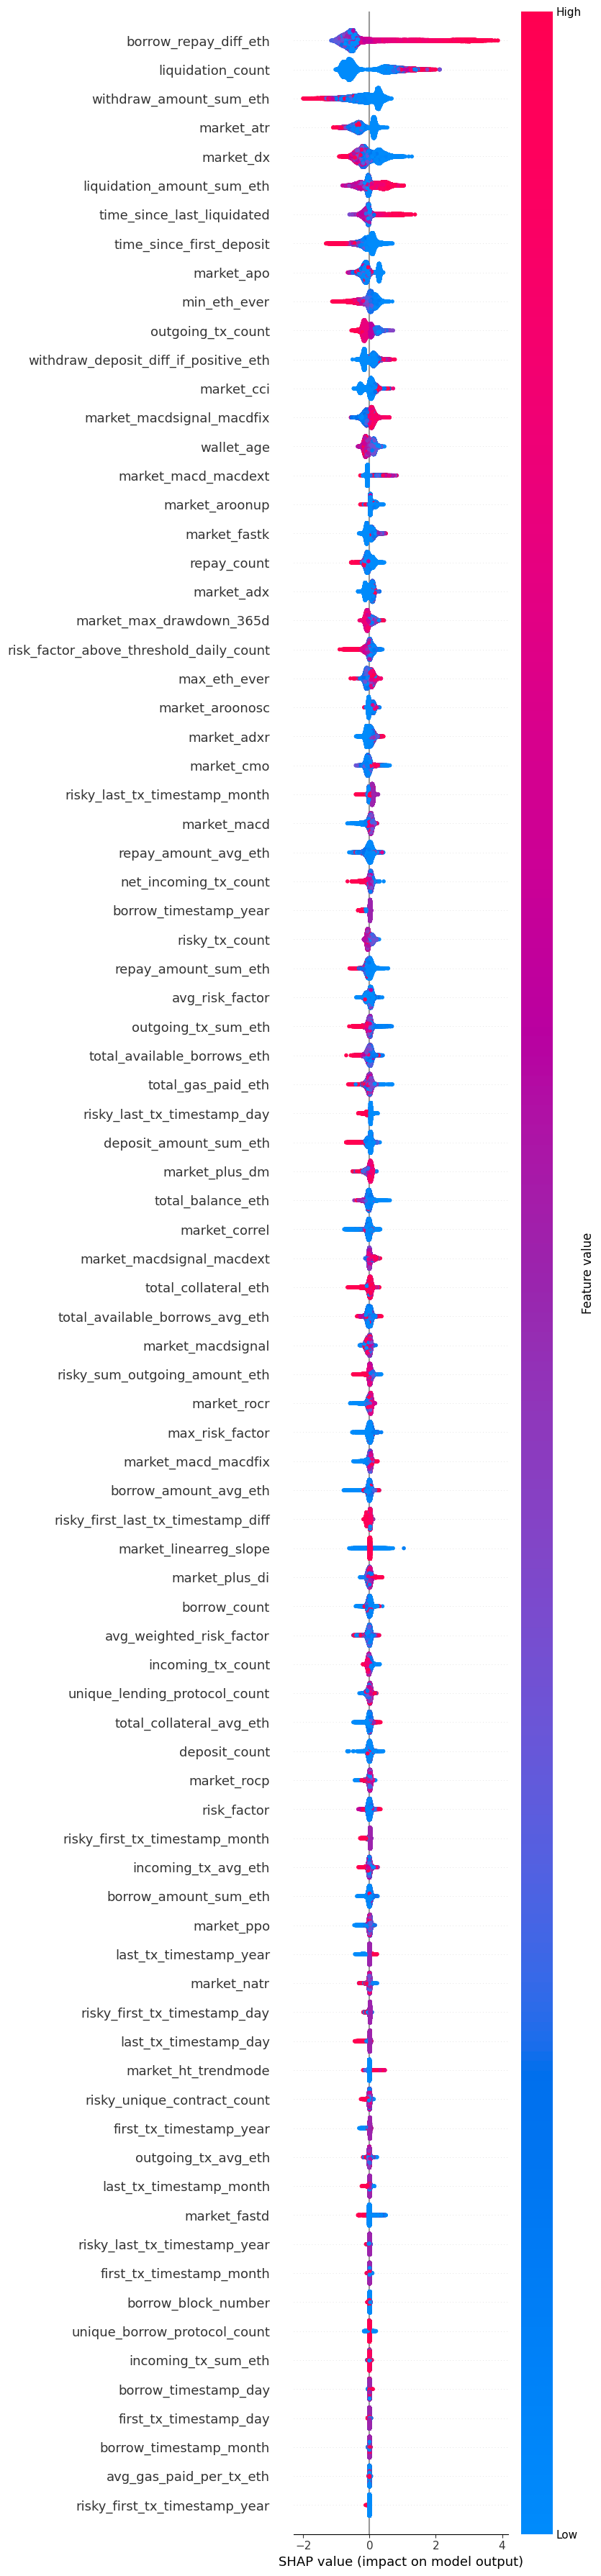

In [37]:
shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1])


Se debe explicar el funcionamiento del modelo utilizando herramientas de interpretabilidad como `SHAP` o `Anchors`.  

Se debe incluir:  
- Justificaciones para tres predicciones concretas.  
- Identificación del atributo más relevante para las predicciones y su relación con el problema.  
- Posibles sesgos hacia atributos específicos y su mitigación.  

El informe debe demostrar cómo estas herramientas permiten interpretar los resultados del modelo y tomar decisiones fundamentadas.

## **4. MLOps [2.5 puntos]**

### **4.1 Tracking con MLFlow [0.6 puntos]**

Durante el proceso de modelamiento, se debe realizar un seguimiento detallado de los elementos generados, incluyendo métricas de desempeño, modelos, hiperparámetros, optimización, interpretabilidad, entre otros.

Requisitos:  
- Configurar MLFlow para rastrear experimentos, entrenamientos y versiones de los modelos.  
- Documentar el seguimiento de los pasos clave del pipeline.  

Se deben presentar los resultados del tracking implementado, destacando elementos como métricas de desempeño, hiperparámetros utilizados y análisis de optimización.  
Para guiarse, se puede consultar el [quickstart guide de MLFlow](https://mlflow.org/docs/latest/tracking.html#quickstart).

**Nota:** Se deben asignar nombres descriptivos a los experimentos para facilitar su identificación y análisis.

### **4.2 Desarrollo de Aplicación Web [0.6 puntos]**

El equipo debe desarrollar una aplicación web que facilite la consulta del producto final por parte del cliente. Para ello, se deben cumplir los siguientes requisitos:

- **Frontend con Gradio:** Crear una interfaz amigable e intuitiva para realizar predicciones.  
- **Backend con FastAPI:** Implementar la lógica de inferencia del modelo en el backend.  
- **Entrada de datos:**  
  - La aplicación debe permitir dos métodos de entrada:  
    1. Carga de un archivo `.csv`.  
    2. Ingreso manual mediante un formulario.  
  - Ambos métodos deben estar habilitados, pero el usuario deberá elegir uno para realizar la predicción.  
- **Dockerización:** Tanto el backend como el frontend deben estar dockerizados para garantizar portabilidad, escalabilidad y despliegue eficiente en diferentes entornos.

El equipo debe asegurar que la comunicación entre backend y frontend permita una experiencia fluida para el usuario.  
Para guiarse, pueden consultar la [cheatsheet de DockerLabs](https://dockerlabs.collabnix.com/docker/cheatsheet/).

### **4.3 Monitoreo [0.3 puntos]**

El equipo debe implementar un sistema de monitoreo para garantizar la consistencia de los datos y el desempeño del modelo en producción. Esto incluye:

- **Data drift:** Desarrollar un método para detectar diferencias significativas entre los nuevos datos y los datos originales.  
- **Evaluación continua:** Supervisar el rendimiento del modelo en producción para identificar desviaciones y anomalías.

Se deben responder las siguientes preguntas:  
- ¿Se detecta data drift? ¿Cómo se abordará?  
- ¿Qué sucede si los datos nuevos son más desbalanceados?  

Además, se deben justificar las decisiones tomadas para manejar estas situaciones.

### **4.4 Canalizaciones Productivas [1.0 puntos]**

El equipo debe diseñar e implementar una canalización productiva utilizando **Apache Airflow** para automatizar y optimizar el flujo de trabajo. Esta canalización debe incluir:

1. **Extracción de datos:** Recolectar datos desde las fuentes definidas (por ejemplo, GitLab).  
2. **Limpieza y transformación:** Garantizar la calidad y consistencia de los datos.  
3. **Análisis de data drift:** Comparar los datos nuevos con el conjunto original para detectar desviaciones significativas.  
4. **Reentrenamiento del modelo:** Activar automáticamente el reentrenamiento si se detecta data drift.  
5. **Tracking de interpretabilidad:** Registrar y guardar figuras generadas por herramientas como SHAP.

El equipo debe integrar las siguientes librerías: **Apache Airflow**, **Optuna**, **SHAP** y **MLFlow**.  
Se debe presentar:

- Una descripción del **DAG** del pipeline, explicando la funcionalidad de cada tarea y la relación entre ellas.  
- Una representación visual del **DAG** con ejemplos de ejecución para distintas fechas.  
- Una explicación de los beneficios de una canalización atomizada e idempotente.  

## **5. Resultados [0.5 puntos]**

El equipo debe documentar los resultados obtenidos a lo largo de las iteraciones del proyecto, considerando que habrá al menos tres ciclos de entrenamiento. Se debe analizar cómo cambiaron los resultados a medida que se ajustaron los modelos y estrategias.

Preguntas a responder:  
- ¿Cuál fue el rendimiento de los modelos para abordar el problema?  
- ¿Qué significan estos resultados en términos prácticos?  
- ¿Cómo evolucionaron los resultados a lo largo de las iteraciones?  
- ¿Qué fenómenos o hiperparámetros podrían explicar gran parte de los resultados obtenidos?  
- ¿Qué factores contribuyeron al overfitting o underfitting y cómo influyeron en la elección del mejor modelo?

El análisis debe ser exhaustivo, explicando los resultados desde un punto de vista técnico y metodológico.

## **6. Conclusiones [0.25 puntos]**

El equipo debe sintetizar los hallazgos del proyecto, conectando todas las secciones del informe desde la Introducción hasta los Resultados. Las conclusiones deben incluir:

- Identificación de los modelos con mejor desempeño.  
- Observaciones generales sobre los datos y la problemática.  
- Reflexiones sobre las herramientas y técnicas utilizadas, destacando su utilidad y limitaciones.  

El cierre debe proporcionar una visión global del proyecto, destacando las decisiones clave tomadas durante su desarrollo y su impacto en los resultados obtenidos.

## **7. Anexo**

Descripción de las variables del dataset:

- borrow_block_number: Número de bloque en el que ocurrió el préstamo.
- borrow_timestamp: Marca temporal que indica el momento del préstamo.
- wallet_address: Dirección de la billetera asociada a las transacciones.
- first_tx_timestamp: Fecha y hora de la primera transacción registrada de la billetera.
- last_tx_timestamp: Fecha y hora de la última transacción registrada de la billetera.
- wallet_age: Tiempo de existencia de la billetera en días.
- incoming_tx_count: Cantidad total de transacciones entrantes a la billetera.
- outgoing_tx_count: Cantidad total de transacciones salientes desde la billetera.
- net_incoming_tx_count: Diferencia neta entre transacciones entrantes y salientes.
- total_gas_paid_eth: Suma total de gas pagado en Ethereum (ETH) por la billetera.
- avg_gas_paid_per_tx_eth: Promedio de gas pagado por transacción en ETH.
- risky_tx_count: Cantidad de transacciones clasificadas como riesgosas.
- risky_unique_contract_count: Número único de contratos asociados con transacciones riesgosas.
- risky_first_tx_timestamp: Marca temporal de la primera transacción riesgosa registrada.
- risky_last_tx_timestamp: Marca temporal de la última transacción riesgosa registrada.
- risky_first_last_tx_timestamp_diff: Diferencia de tiempo entre la primera y la última transacción riesgosa.
- risky_sum_outgoing_amount_eth: Suma total de ETH saliente en transacciones riesgosas.
- outgoing_tx_sum_eth: Suma total de ETH saliente en todas las transacciones.
- incoming_tx_sum_eth: Suma total de ETH entrante en todas las transacciones.
- outgoing_tx_avg_eth: Promedio de ETH saliente por transacción.
- incoming_tx_avg_eth: Promedio de ETH entrante por transacción.
- max_eth_ever: Máximo balance en ETH registrado en la billetera.
- min_eth_ever: Mínimo balance en ETH registrado en la billetera.
- total_balance_eth: Balance total actual de la billetera en ETH.
- risk_factor: Factor de riesgo calculado para la billetera.
- total_collateral_eth: Colateral total en ETH asociado a la billetera.
- total_collateral_avg_eth: Promedio de colateral total en ETH.
- total_available_borrows_eth: Cantidad total de ETH disponible para préstamos.
- total_available_borrows_avg_eth: Promedio de ETH disponible para préstamos.
- avg_weighted_risk_factor: Promedio ponderado del factor de riesgo.
- risk_factor_above_threshold_daily_count: Número de días en que el factor de riesgo estuvo por encima de un umbral.
- avg_risk_factor: Promedio general del factor de riesgo.
- max_risk_factor: Valor máximo del factor de riesgo registrado.
- borrow_amount_sum_eth: Suma total de los montos prestados en ETH.
- borrow_amount_avg_eth: Promedio de los montos prestados en ETH.
- borrow_count: Número total de transacciones de préstamo.
- repay_amount_sum_eth: Suma total de los montos reembolsados en ETH.
- repay_amount_avg_eth: Promedio de los montos reembolsados en ETH.
- repay_count: Número total de transacciones de reembolso.
- borrow_repay_diff_eth: Diferencia entre el monto prestado y el reembolsado en ETH.
- deposit_count: Número total de depósitos realizados.
- deposit_amount_sum_eth: Suma total de los depósitos en ETH.
- time_since_first_deposit: Tiempo transcurrido desde el primer depósito registrado.
- withdraw_amount_sum_eth: Suma total de los retiros en ETH.
- withdraw_deposit_diff_if_positive_eth: Diferencia positiva entre retiros y depósitos en ETH.
- liquidation_count: Número total de liquidaciones registradas.
- time_since_last_liquidated: Tiempo transcurrido desde la última liquidación.
- liquidation_amount_sum_eth: Suma total en ETH liquidada.
- market_adx: Índice direccional promedio del mercado.
- market_adxr: Índice direccional promedio suavizado del mercado.
- market_apo: Oscilador del precio promedio del mercado.
- market_aroonosc: Oscilador de Aroon para el mercado.
- market_aroonup: Valor de Aroon-Up del mercado.
- market_atr: Rango verdadero promedio del mercado.
- market_cci: Índice de canal de productos básicos del mercado.
- market_cmo: Oscilador de momento de Chande del mercado.
- market_correl: Correlación del mercado.
- market_dx: Índice direccional del mercado.
- market_fastk: Componente rápido K del estocástico del mercado.
- market_fastd: Componente rápido D del estocástico del mercado.
- market_ht_trendmode: Modo de tendencia Hilbert del mercado.
- market_linearreg_slope: Pendiente de la regresión lineal del mercado.
- market_macd_macdext: Componente MACD extendido del mercado.
- market_macd_macdfix: Componente MACD fijo del mercado.
- market_macd: Línea MACD del mercado.
- market_macdsignal_macdext: Señal MACD extendida del mercado.
- market_macdsignal_macdfix: Señal MACD fija del mercado.
- market_macdsignal: Línea de señal MACD del mercado.
- market_max_drawdown_365d: Máxima caída en 365 días del mercado.
- market_natr: Rango verdadero promedio normalizado del mercado.
- market_plus_di: Indicador direccional positivo del mercado.
- market_plus_dm: Movimiento direccional positivo del mercado.
- market_ppo: Oscilador de porcentaje de precio del mercado.
- market_rocp: Cambio porcentual del precio del mercado.
- market_rocr: Relación de cambio porcentual del mercado.
- unique_borrow_protocol_count: Número único de protocolos de préstamo utilizados.
- unique_lending_protocol_count: Número único de protocolos de préstamo activos.
- target: Variable objetivo que indica el estado de morosidad del cliente.